In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False 

In [2]:
poplu2=pd.read_csv('../data/2014 t.csv', thousands=',', encoding='euc-kr')
poplu2.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수
0,108.0,2014-01-01,4.0,0.3,7.9,29.0,NaN,NaN,NaN
1,108.0,2014-01-02,1.5,-1.3,6.2,17.0,NaN,NaN,NaN
2,108.0,2014-01-03,2.3,-1.1,7.3,32.0,NaN,NaN,NaN
3,108.0,2014-01-04,-0.1,-3.7,5.6,33.0,NaN,NaN,NaN
4,108.0,2014-01-05,-0.8,-4.3,3.8,27.0,NaN,NaN,NaN


In [3]:
for i in poplu2.index:
    if poplu2.values[i,2] < 17 :
        if poplu2.values[i,5] >70:
            poplu2['습도위험지수'].values[i] = '1'
        elif 59< poplu2.values[i,5] <70:
            poplu2['습도위험지수'].values[i] = '2'
        elif 49< poplu2.values[i,5] <60:
            poplu2['습도위험지수'].values[i] = '3'
        else:
            poplu2['습도위험지수'].values[i] = '4'
    elif 17<poplu2.values[i,2] < 21:
        if poplu2.values[i,5] >60:
            poplu2['습도위험지수'].values[i] = '1'
        elif 49< poplu2.values[i,5] <60:
            poplu2['습도위험지수'].values[i] = '2'
        elif 39< poplu2.values[i,5] <50:
            poplu2['습도위험지수'].values[i] = '3'
        else:
            poplu2['습도위험지수'].values[i] = '4'
            
    elif 20<poplu2.values[i,2] < 24:
        if poplu2.values[i,5] >50:
            poplu2['습도위험지수'].values[i] = '1'
        elif 39< poplu2.values[i,5] <50:
            poplu2['습도위험지수'].values[i] = '2'
        elif 29< poplu2.values[i,5] <40:
            poplu2['습도위험지수'].values[i] = '3'
        else:
            poplu2['습도위험지수'].values[i] = '4'
    elif poplu2.values[i,2] > 23:
        if poplu2.values[i,5] >40:
            poplu2['습도위험지수'].values[i] = '1'
        elif 29< poplu2.values[i,5] <40:
            poplu2['습도위험지수'].values[i] = '2'
        elif 19< poplu2.values[i,5] <30:
            poplu2['습도위험지수'].values[i] = '3'
        else:
            poplu2['습도위험지수'].values[i] = '4'
poplu2.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수
0,108.0,2014-01-01,4.0,0.3,7.9,29.0,NaN,NaN,4.0
1,108.0,2014-01-02,1.5,-1.3,6.2,17.0,NaN,NaN,4.0
2,108.0,2014-01-03,2.3,-1.1,7.3,32.0,NaN,NaN,4.0
3,108.0,2014-01-04,-0.1,-3.7,5.6,33.0,NaN,NaN,4.0
4,108.0,2014-01-05,-0.8,-4.3,3.8,27.0,NaN,NaN,4.0


In [4]:
poplu2['일교차'] = poplu2['최고기온(°C)'] -  poplu2['최저기온(°C)']
poplu2.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수,일교차
0,108.0,2014-01-01,4.0,0.3,7.9,29.0,NaN,NaN,4.0,7.6
1,108.0,2014-01-02,1.5,-1.3,6.2,17.0,NaN,NaN,4.0,7.5
2,108.0,2014-01-03,2.3,-1.1,7.3,32.0,NaN,NaN,4.0,8.4
3,108.0,2014-01-04,-0.1,-3.7,5.6,33.0,NaN,NaN,4.0,9.3
4,108.0,2014-01-05,-0.8,-4.3,3.8,27.0,NaN,NaN,4.0,8.1


In [5]:
for i in poplu2.index:    
    if poplu2.values[i,3] <6 or 29<poplu2.values[1,2]:
        poplu2['최저기온위험지수'].values[i] = '4' 
    elif 5<poplu2.values[i,3] <15:
        poplu2['최저기온위험지수'].values[i] = '3' 
    elif 14<poplu2.values[i,3] <25:
        poplu2['최저기온위험지수'].values[i] = '2'  
    elif 24< poplu2.values[i,3] <30:
        poplu2['최저기온위험지수'].values[i] = '1' 
        
    if poplu2.values[i,9] < 3 :  
        poplu2['일교차위험지수'].values[i] = '1' 
    elif 2< poplu2.values[i,9] < 6: 
        poplu2['일교차위험지수'].values[i] = '2'  
    elif 5<poplu2.values[i,9] < 10:  
        poplu2['일교차위험지수'].values[i] = '3'  
    elif 9< poplu2.values[i,9] : 
        poplu2['일교차위험지수'].values[i] = '4'  

poplu2.head(10)

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수,일교차
0,108.0,2014-01-01,4.0,0.3,7.9,29.0,4.0,3.0,4.0,7.6
1,108.0,2014-01-02,1.5,-1.3,6.2,17.0,4.0,3.0,4.0,7.5
2,108.0,2014-01-03,2.3,-1.1,7.3,32.0,4.0,3.0,4.0,8.4
3,108.0,2014-01-04,-0.1,-3.7,5.6,33.0,4.0,3.0,4.0,9.3
4,108.0,2014-01-05,-0.8,-4.3,3.8,27.0,4.0,3.0,4.0,8.1
5,108.0,2014-01-06,0.8,-3.7,6.4,31.0,4.0,4.0,4.0,10.1
6,108.0,2014-01-07,3.0,0.3,5.5,43.0,4.0,2.0,4.0,5.2
7,108.0,2014-01-08,0.5,-5.7,4.0,31.0,4.0,3.0,4.0,9.7
8,108.0,2014-01-09,-7.8,-10.4,-4.3,13.0,4.0,3.0,4.0,6.1
9,108.0,2014-01-10,-4.7,-9.3,-0.9,30.0,4.0,3.0,4.0,8.4


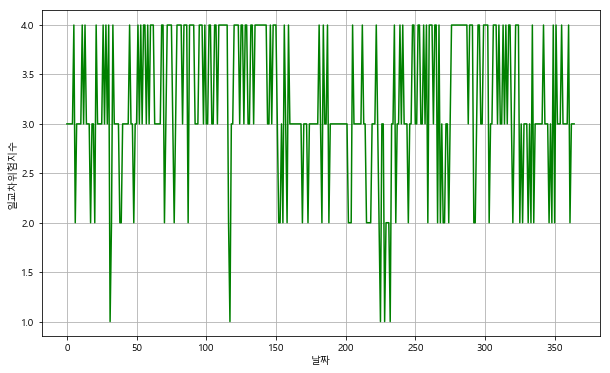

In [6]:
plt.figure(figsize=(10,6))
plt.plot(poplu2.index,poplu2['일교차위험지수'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('일교차위험지수')
plt.grid()
plt.show()

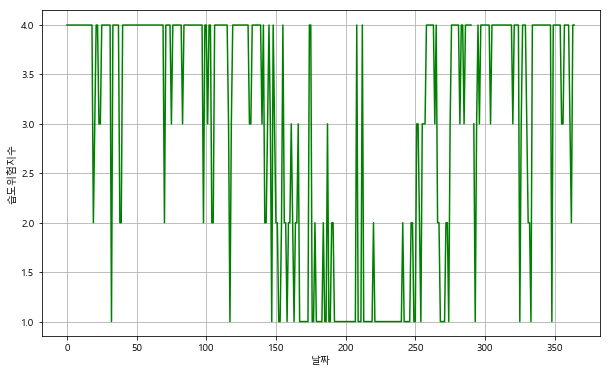

In [7]:
plt.figure(figsize=(10,6))
plt.plot(poplu2.index,poplu2['습도위험지수'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('습도위험지수')
plt.grid()
plt.show()

In [8]:
name = [1,2,3,4,5,6,7,8,9,10,11,12]

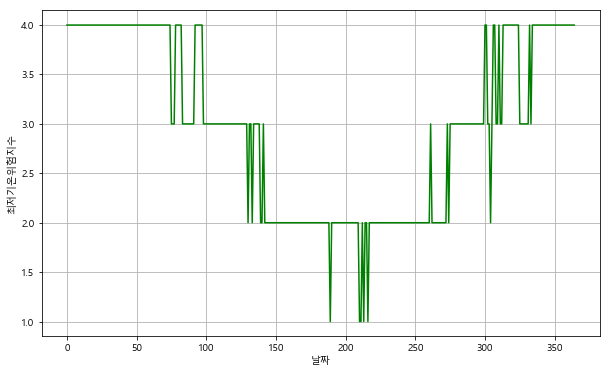

In [9]:
plt.figure(figsize=(10,6))
plt.plot(poplu2.index,poplu2['최저기온위험지수'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('최저기온위험지수')
plt.grid()
plt.show()

In [12]:
poplu2=pd.read_csv('../data/2015ojeon.csv', thousands=',', encoding='euc-kr')
poplu2.head()

,일시,평균 오존전량(DU),오존위험지수
0,2015-01-01,354.9,NaN
1,2015-01-02,365.5,NaN
2,2015-01-03,373.2,NaN
3,2015-01-04,339.8,NaN
4,2015-01-05,269.9,NaN


In [14]:
for i in poplu2.index:    
    if poplu2.values[i,1] < 300:
        poplu2['오존위험지수'].values[i] = '1' 
    elif 299<poplu2.values[i,1] <350:
        poplu2['오존위험지수'].values[i] = '2' 
    elif 349<poplu2.values[i,1] <400:
        poplu2['오존위험지수'].values[i] = '3'  
    elif 399< poplu2.values[i,1]:
        poplu2['오존위험지수'].values[i] = '4' 

        
poplu2.head()

,일시,평균 오존전량(DU),오존위험지수
0,2015-01-01,354.9,3.0
1,2015-01-02,365.5,3.0
2,2015-01-03,373.2,3.0
3,2015-01-04,339.8,2.0
4,2015-01-05,269.9,1.0


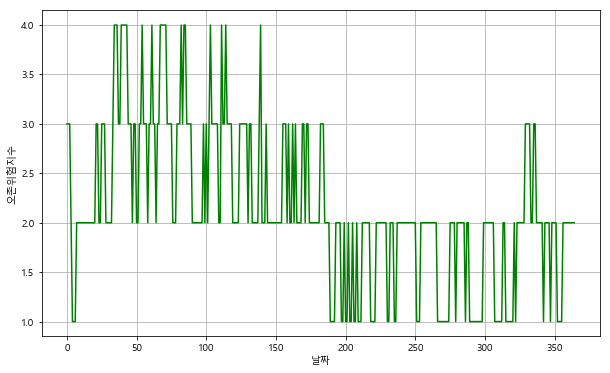

In [15]:
plt.figure(figsize=(10,6))
plt.plot(poplu2.index,poplu2['오존위험지수'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('오존위험지수')
plt.grid()
plt.show()